In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
dataset = pd.read_csv('fuel.csv')
dataset.columns = ['y', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8']
dataset

,y,x1,x2,x3,x4,x5,x6,x7,x8
0,343,0,52.8,811.7,2.11,220,261,87,1.8
1,356,1,52.8,811.7,2.11,220,261,87,1.8
2,344,0,50.0,821.3,2.11,223,260,87,16.6
3,356,1,50.0,821.3,2.11,223,260,87,16.6
4,352,0,47.2,832.0,2.09,221,261,92,23.0
5,361,1,47.2,832.0,2.09,221,261,92,23.0
6,372,0,47.0,831.3,2.26,190,323,75,25.1
7,355,1,47.0,831.3,2.26,190,323,75,25.1
8,375,0,48.3,836.8,2.47,180,364,71,26.1
9,359,1,48.3,836.8,2.47,180,364,71,26.1


a) Fit a smiple linear regression model

In [2]:
y = dataset['y'].to_numpy()
x = dataset['x5'].to_numpy()

In [17]:
n = len(y)
s_xy = sum(x*y) - sum(y) * sum(x) / n
s_xx = sum(x**2) - sum(x)**2 / n
b1_hat = s_xy / s_xx
b0_hat = np.average(y) - b1_hat * np.average(x)
print(f'y_hat = {round(b0_hat, 4)} + ({round(b1_hat, 4)} * x_4)')

y_hat = 410.7232 + (-0.2638 * x_4)


In [4]:
print(f'range x: {min(x), max(x)}')

range x: (175, 223)


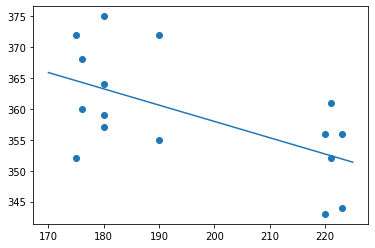

In [5]:
reg_x = np.linspace(170,225,100)
reg_y = [reg_x_i * b1_hat + b0_hat for reg_x_i in reg_x]
plt.plot(reg_x, reg_y)
plt.scatter(x, y)
plt.show()

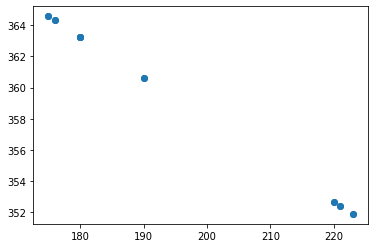

In [6]:
y_hat = x * b1_hat + b0_hat
plt.scatter(x, y_hat)
plt.title('predictions')

b1) analysis of variance table and regression significance
TABLE IS AT THE END OF THE EXERCISE

In [18]:
y_avg = np.average(y)
ss_t = sum((y - y_avg)**2)
ss_r = sum((y_hat - y_avg)**2)
ss_res = sum((y - y_hat)**2)
print('ss_t = ', ss_t)
print('ss_r + ss_res = ', ss_r + ss_res)

ss_t =  1321.75
ss_r + ss_res =  1321.7500000000005


In [19]:
F0 = ss_r / (ss_res / (n-2))
print('F0 = ', F0)

F0 =  7.514287457002304


In [25]:
from scipy.stats import f
f_critical_value = abs(f.ppf(0.95, 1, n-2))

In [26]:
print(f'Significant regression at alpha=0.95: {F0 > f_critical_value}')

Significant regression at alpha=0.95: True


c) 95% CI on the slope

In [11]:
from scipy.stats import t
alpha = 0.05
t_value = abs(t.ppf(alpha/2, n-2))
ms_res = ss_res / (n - 2)
se_b1 = np.sqrt(ms_res/s_xx)

In [22]:
b1_ci = (b1_hat - t_value * se_b1, b1_hat + t_value * se_b1)
print('CI = ', b1_ci)

CI =  (-0.47013245286977273, -0.05738892753183972)


d) calculate R^2

In [23]:
r2 = ss_r / ss_t
print('R^2 =', r2)

R^2 = 0.34926964102437025


b2) ANOVA table

In [16]:
anova_df = pd.DataFrame(columns = ['Sum of squares', 'DoF', 'Mean Square', 'F0'],
             index = ['Regression', 'Residual', 'Total'])
anova_df.loc['Regression', 'Sum of squares'] = ss_r
anova_df.loc['Regression', 'DoF'] = 1
anova_df.loc['Regression', 'Mean Square'] = ss_r / 1
anova_df.loc['Regression', 'F0'] = F0

anova_df.loc['Residual', 'Sum of squares'] = ss_res
anova_df.loc['Residual', 'DoF'] = n-2
anova_df.loc['Residual', 'Mean Square'] = ms_res

anova_df.loc['Total', 'Sum of squares'] = ss_t
anova_df.loc['Total', 'DoF'] = n-1
anova_df

,Sum of squares,DoF,Mean Square,F0
Regression,461.647148,1,461.647148,7.514287
Residual,860.102852,14,61.435918,NaN
Total,1321.75,15,NaN,NaN


The regression statistic is significant at the 95% significance level.
However, we see low explanation of variance (R^2), indicating that there is a lot of unexplained variation.